In [1]:
# WISE 1049AB Epoch 2 Data
# Notes from ReadME 

"""
README NOTES ON FILES

	*_fluxarr.fits contains 2D array of binned spectral array in shape of (npix, ntimes)
	*_Jy_fluxarr.fits are in unit of Jy
	*_flam_fluxarr.fits are in unit of W/m^2/micron and with bad pixels removed

	*_wlarr.fits contains 1D array of wavelengths in shape of (npix)
	in unit of microns

	*_mjdarr.fits contains 1D array of binned time points in shape of (ntimes)
	in unit of days

	The binning factor is 100 for NIRSpec (i.e. cadence of 45s) and 10 for MIRI (i.e. cadence of 129s)
	
"""

'\nREADME NOTES ON FILES\n\n\t*_fluxarr.fits contains 2D array of binned spectral array in shape of (npix, ntimes)\n\t*_Jy_fluxarr.fits are in unit of Jy\n\t*_flam_fluxarr.fits are in unit of W/m^2/micron and with bad pixels removed\n\n\t*_wlarr.fits contains 1D array of wavelengths in shape of (npix)\n\tin unit of microns\n\n\t*_mjdarr.fits contains 1D array of binned time points in shape of (ntimes)\n\tin unit of days\n\n\tThe binning factor is 100 for NIRSpec (i.e. cadence of 45s) and 10 for MIRI (i.e. cadence of 129s)\n\t\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as fits
import astropy.units as u

Flux data shape: (369, 571)
Wavelength data shape: (369,)


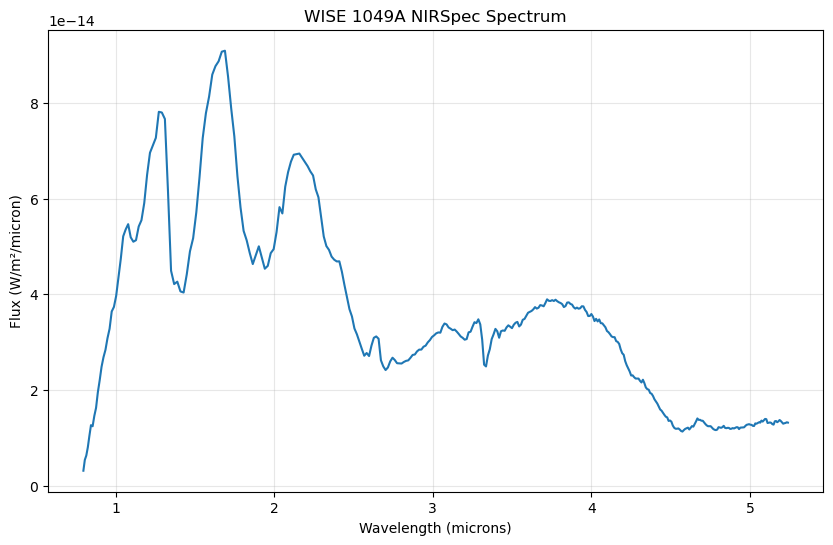

In [ ]:
# Load in Component A First
nir_path = 'WISE1049A/NIRSpec/'
miri_path = 'WISE1049A/MIRI/'

flux = nir_path + "W1049A_flam_fluxarr.fits"

flux_err = nir_path + "W1049A_flam_fluxerrarr.fits" 

wavelength = nir_path + "W1049A_wlarr.fits"


# Open the FITS files
with fits.open(flux) as hdul_flux:
    nir_flux_dat = hdul_flux[0].data  # Get the data from the primary HDU

with fits.open(wavelength) as hdul_wl:
    wl_data = hdul_wl[0].data  # Get the wavelength data


# Print shapes to understand the data structure
print(f"Flux data shape: {nir_flux_dat.shape}")
print(f"Wavelength data shape: {wl_data.shape}")

# If nir_flux_dat is 2D (wavelength, time), we can plot the spectrum for the first time point
if len(nir_flux_dat.shape) == 2:
    spectrum = nir_flux_dat[:, 0]  # First time point
    plt.figure(figsize=(10, 6))
    plt.plot(wl_data, spectrum)
    plt.xlabel('Wavelength (microns)')
    plt.ylabel('Flux (W/m²/micron)')
    plt.title('WISE 1049A NIRSpec Spectrum')
    plt.grid(True, alpha=0.3)

Flux data shape: (367, 219)
Wavelength data shape: (367,)


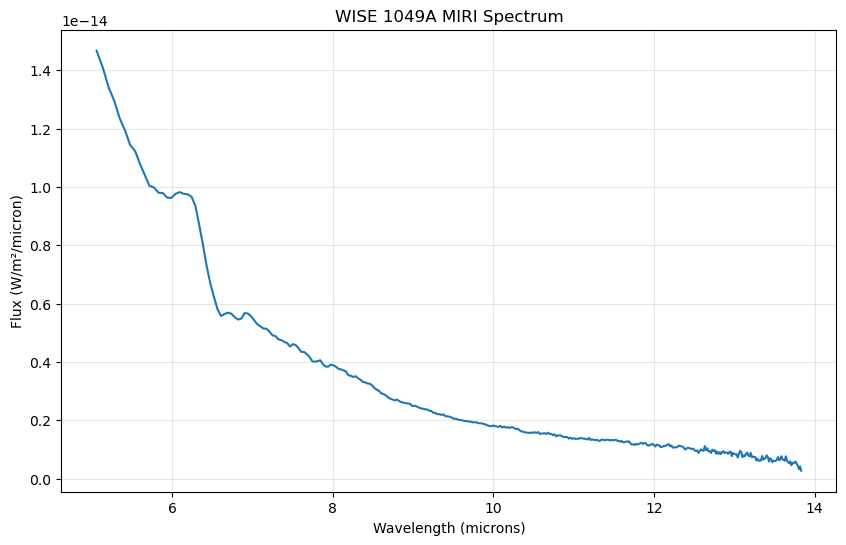

In [ ]:
# Load in Component A First
nir_path = 'WISE1049A/NIRSpec/'
miri_path = 'WISE1049A/MIRI/'

flux = miri_path + "W1049A_flam_fluxarr.fits"

flux_err = miri_path + "W1049A_flam_fluxerrarr.fits" 

wavelength = miri_path + "W1049A_wlarr.fits"


# Open the FITS files
with fits.open(flux) as hdul_flux:
    nir_flux_dat = hdul_flux[0].data  # Get the data from the primary HDU

with fits.open(wavelength) as hdul_wl:
    wl_data = hdul_wl[0].data  # Get the wavelength data


# Print shapes to understand the data structure
print(f"Flux data shape: {nir_flux_dat.shape}")
print(f"Wavelength data shape: {wl_data.shape}")

# If nir_flux_dat is 2D (wavelength, time), we can plot the spectrum for the first time point
if len(nir_flux_dat.shape) == 2:
    spectrum = nir_flux_dat[:, 0]  # First time point
    plt.figure(figsize=(10, 6))
    plt.plot(wl_data, spectrum)
    plt.xlabel('Wavelength (microns)')
    plt.ylabel('Flux (W/m²/micron)')
    plt.title('WISE 1049A MIRI Spectrum')
    plt.grid(True, alpha=0.3)

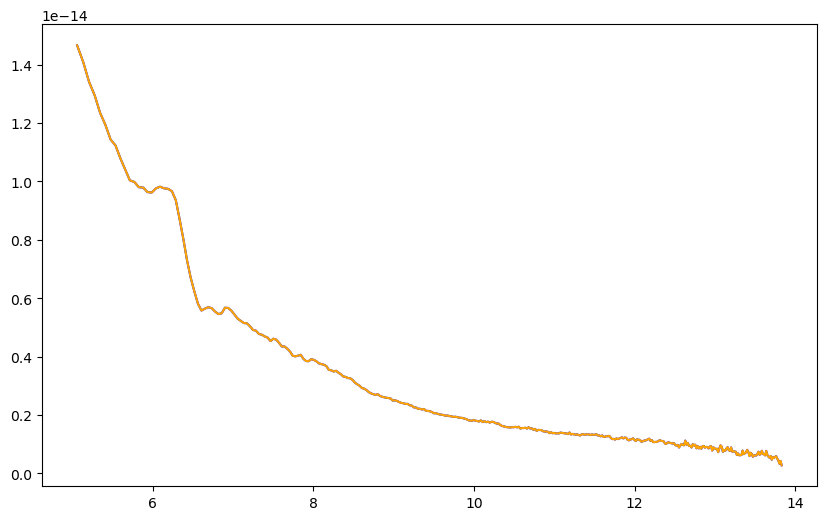

In [ ]:
# overlay the nirspec and miri spectra together
plt.figure(figsize=(10, 6))
plt.plot(wl_data, spectrum, label='MIRI Spectrum', color='blue')
plt.plot(wl_data, nir_flux_dat[:, 0], label='NIRSpec Spectrum',        color='orange')

In [ ]:
# Cut MIRI Data at 12 Microns 